# Regression

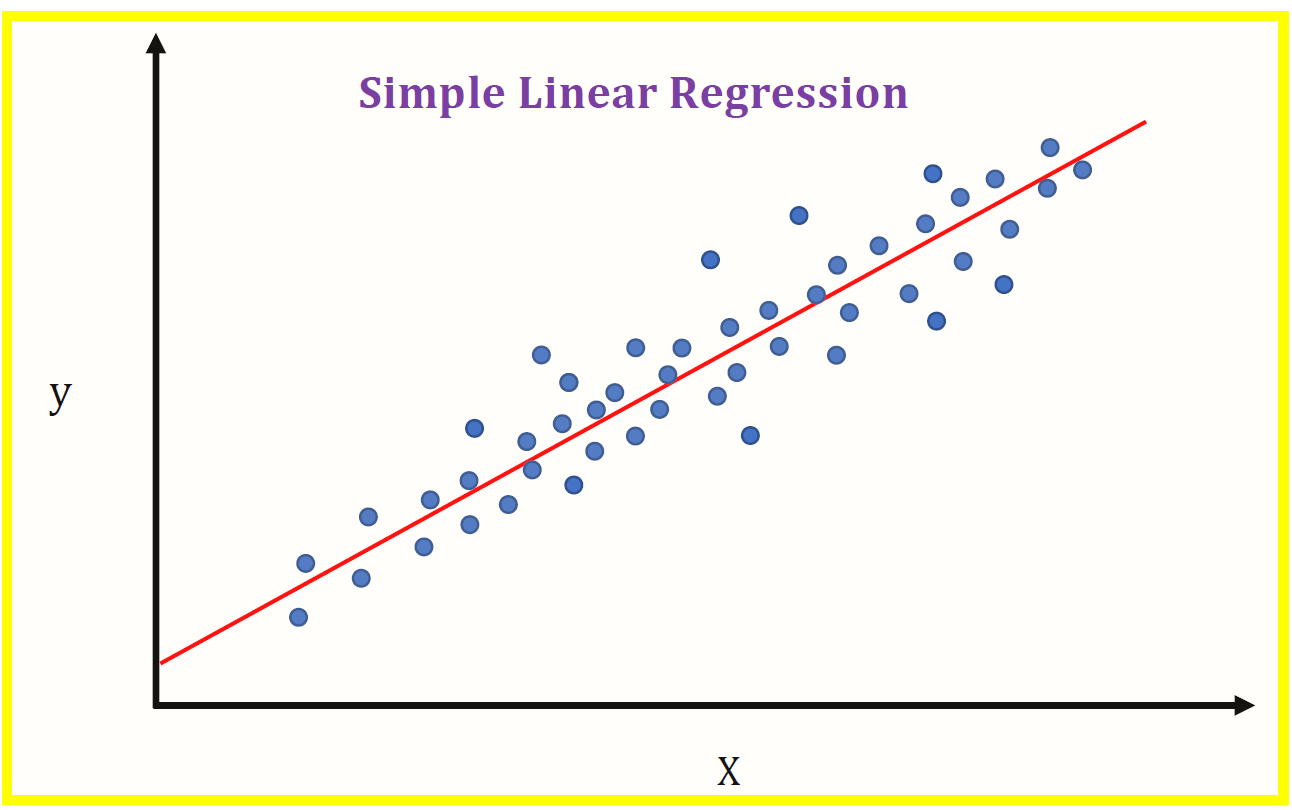

## Load Data

Data yang akan digunakan dalam sesi ini adalah data medical insurance costs, yang dapat diakses melalui link berikut https://www.kaggle.com/mirichoi0218/insurance

In [2]:
## read data titanic
import pandas as pd
df_insurance=pd.read_csv('/content/insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Checking

In [3]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check missing values and duplicate rows

In [4]:
df_insurance.isna().any().any()

False

In [5]:
print("Numbers of duplicated rows :",df_insurance.duplicated().sum())

Numbers of duplicated rows : 1


In [6]:
df_insurance=df_insurance.drop_duplicates(keep="first")
print("After removing,now number of duplicated rows are:",df_insurance.duplicated().sum())

After removing,now number of duplicated rows are: 0


### Data Exploration

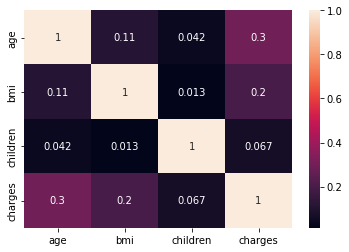

In [7]:
import seaborn as sns
sns.heatmap(df_insurance.corr(),annot=True)

### Data Visualization

#### Correlation check

Text(0.5, 1.0, 'Scatter plot of Charges vs age')

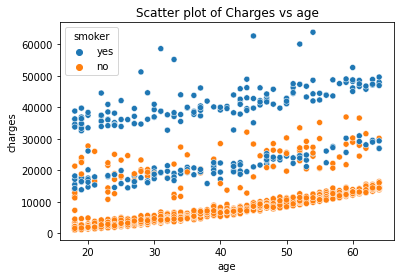

In [14]:
ax=sns.scatterplot(data=df_insurance, x='age', y='charges',hue='smoker')
ax.set_title('Scatter plot of Charges vs age')

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

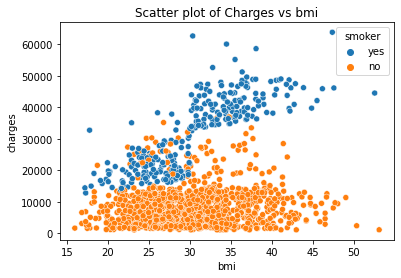

In [11]:
ax=sns.scatterplot(x='bmi',y='charges',data=df_insurance,hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

Text(0.5, 1.0, 'Box plot for charges across gender')

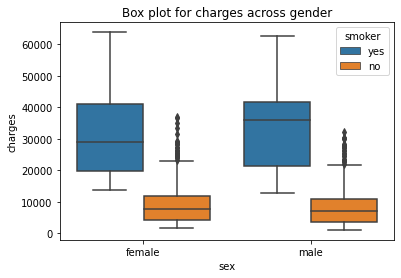

In [15]:
ax=sns.boxplot(data=df_insurance, x='sex', y='charges', hue='smoker')
ax.set_title('Box plot for charges across gender')

Text(0.5, 1.0, 'Box plot for charges across no. of children')

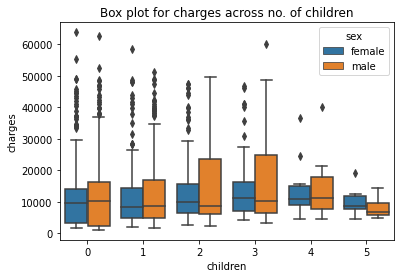

In [18]:
ax=sns.boxplot(x='children', y='charges',hue='sex',data=df_insurance)
ax.set_title('Box plot for charges across no. of children')

#### Assumption check

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of insurance charges in $log$ scale')

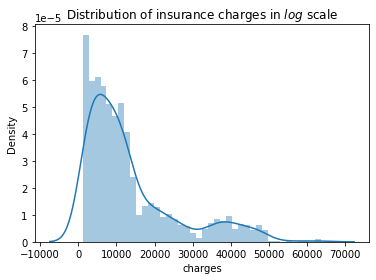

In [24]:
ax=sns.distplot(df_insurance['charges'],bins=40)
ax.set_title('Distribution of insurance charges')

Text(0.5, 1.0, 'Distribution of age')

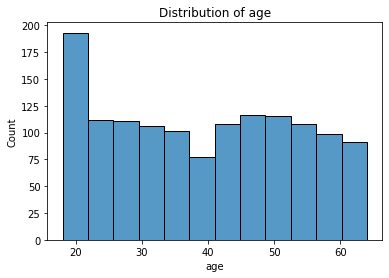

In [26]:
ax=sns.histplot(data=df_insurance, x='age')
ax.set_title('Distribution of age')

Text(0.5, 1.0, 'Distribution of bmi')

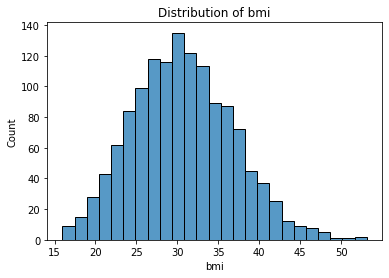

In [27]:
ax=sns.histplot(data=df_insurance, x='bmi')
ax.set_title('Distribution of bmi')

### Feature Engineering

In [29]:
### one hot encoder
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df_insurance, columns = categorical_columns, drop_first =True,dtype='int8')
df_encode

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [31]:
### data normalization
import numpy as np
df_encode['charges'] = np.log(df_encode['charges'])
df_encode

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,9.268661,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,7.698927,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,7.396233,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,7.604867,0,0,0,0,0,0,0,0,0,1


### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
Y=df_encode.charges
X=df_encode.drop(["charges"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Regression

## Sklearn

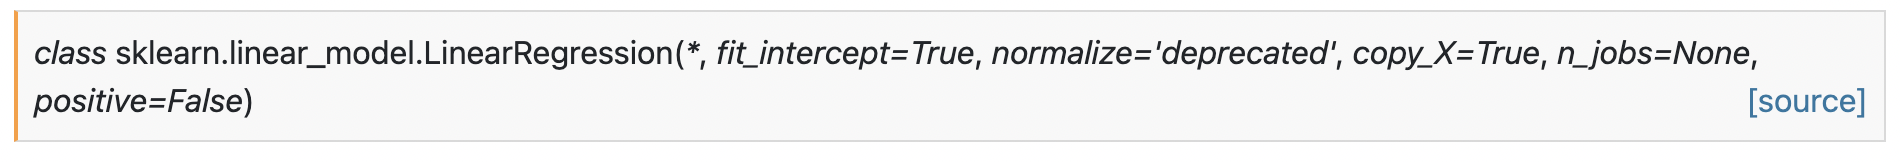

In [34]:
### contoh linear regression
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

untuk menampilkan properti dari model yang sudah kita buat, kita dapat melihat 

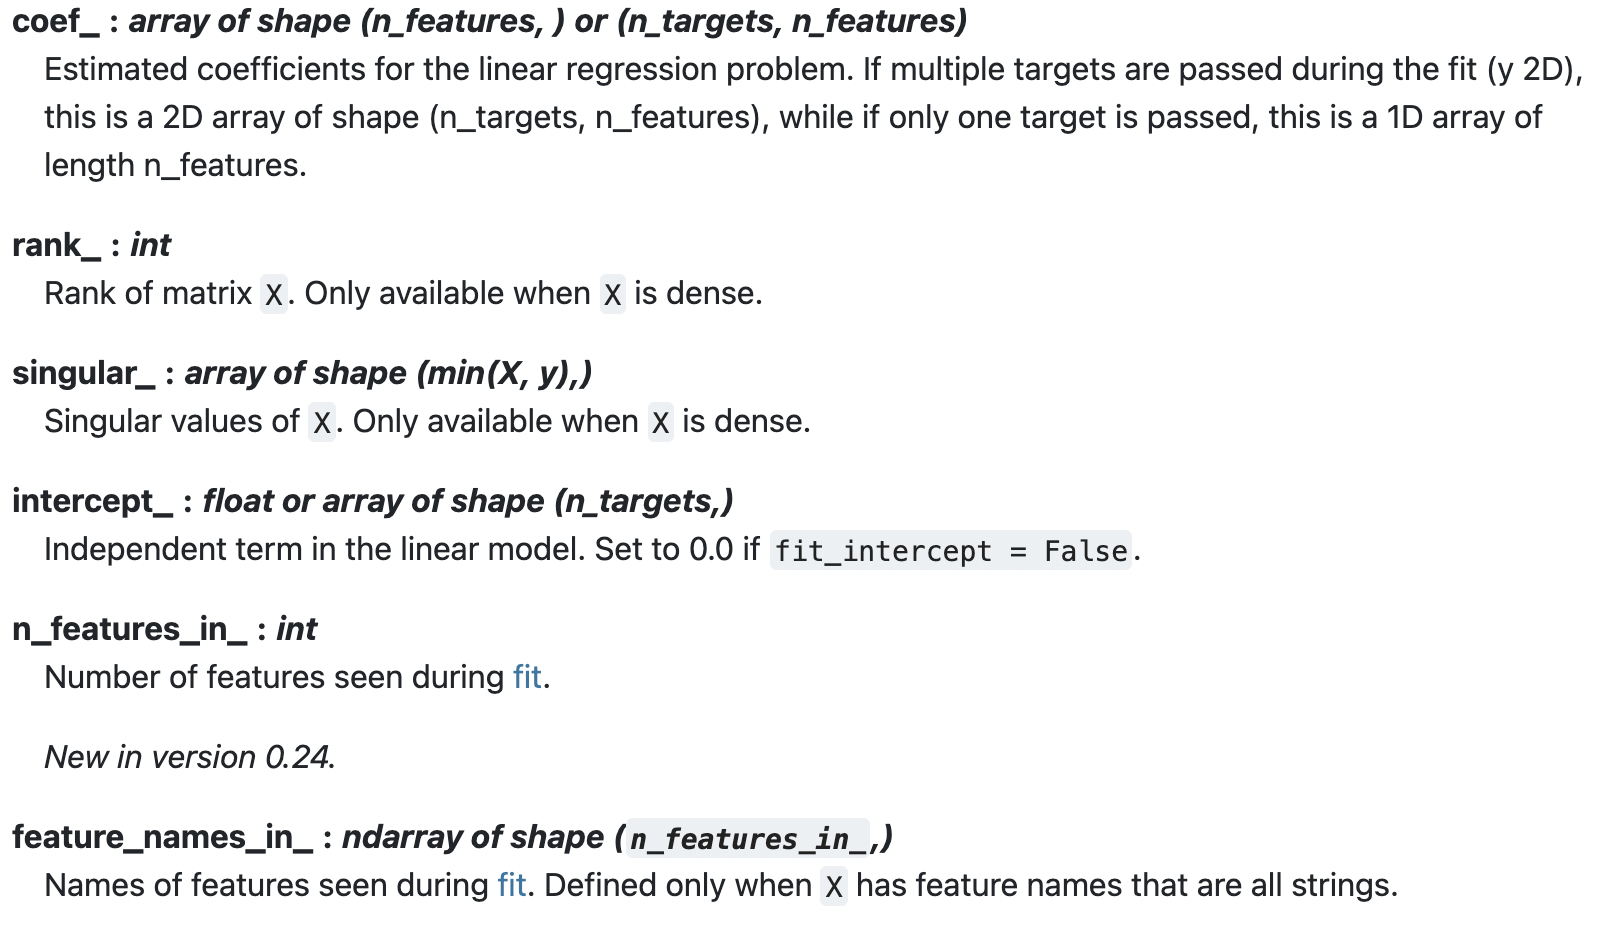

In [35]:
### contoh get model properties
print(lin_reg.intercept_)
print(lin_reg.coef_)

7.045499885138694
[ 0.03411264  0.01284092 -0.0799425   0.13306472  0.27408622  0.2218673
  0.57261811  0.41104272  1.53908071 -0.0488762  -0.13103386 -0.10396093]


untuk melihat coefficient lebih lanjut, bisa menggunakan fungsi berikut

In [40]:
parameter = ['theta_'+str(i) for i in range(X.shape[1]+1)]
columns = ['intersect:x_0=1'] + list(X.columns.values)
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'coeff':sk_theta})
parameter_df

['theta_0', 'theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6', 'theta_7', 'theta_8', 'theta_9', 'theta_10', 'theta_11', 'theta_12']
['intersect:x_0=1', 'age', 'bmi', 'sex_male', 'children_1', 'children_2', 'children_3', 'children_4', 'children_5', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


,Parameter,Columns,coeff
0,theta_0,intersect:x_0=1,7.045500
1,theta_1,age,0.034113
2,theta_2,bmi,0.012841
3,theta_3,sex_male,-0.079943
4,theta_4,children_1,0.133065
5,theta_5,children_2,0.274086
6,theta_6,children_3,0.221867
7,theta_7,children_4,0.572618
8,theta_8,children_5,0.411043
9,theta_9,smoker_yes,1.539081


untuk melakukan prediksi, kita bisa menggunakan fungsi predict

In [62]:
y_pred = lin_reg.predict(x_test)
y_actual_pred=np.exp(y_pred)
y_actual_pred

array([ 7526.53353355,  6851.00780567, 12400.00649221, 26284.11696948,
        5762.14080531, 10527.98048042, 24689.51524565,  2993.05919329,
        7879.53731942,  9686.35652649, 11479.40093694, 39377.36840786,
       25877.96944933, 14580.06129249,  8125.0177343 ,  8427.75485975,
        3296.65709071, 26548.38539547,  4133.75304517,  4522.22765521,
        3042.60421262, 27601.47467035, 12186.96053715, 27654.19490664,
       24776.70658134,  4531.98527572, 43423.30590104, 52502.57452513,
       10356.0615121 , 15260.75504629,  4924.08998541,  9407.22165314,
        2646.69225214, 11619.40702091, 54416.19349504, 10441.12447396,
        4306.89300362,  4905.17675461, 34542.61869245,  7918.04649581,
        4052.5867732 , 39454.61882127, 37205.16029057, 10437.16476225,
        8920.14528494,  3744.29445612,  3557.30870562,  7520.51967936,
        4527.25674335,  7004.28850567,  5257.73912929,  6930.44708074,
       36643.0370395 ,  2820.76690641,  8334.16244232,  8132.74309795,
      

## Statsmodel

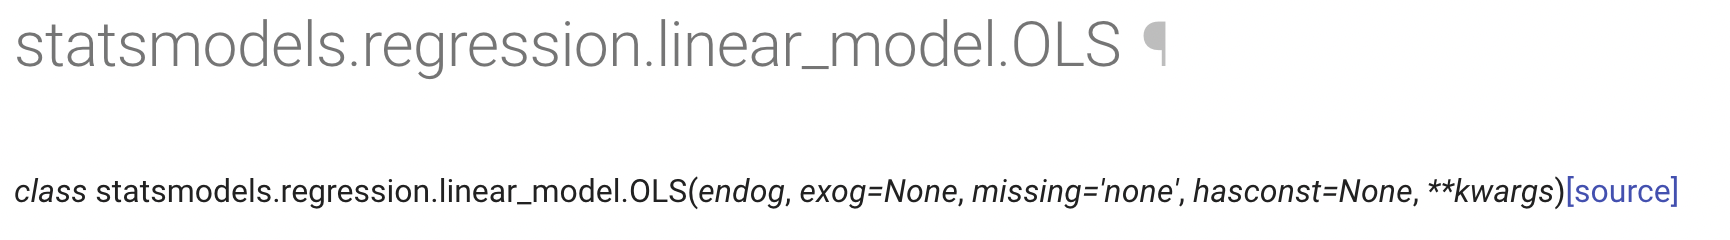

In [60]:
### contoh statsmodel
import statsmodels.api as sm
x_train1 = sm.add_constant(x_train)
results = sm.OLS(y_train,x_train1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     267.6
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          5.30e-310
Time:                        10:03:42   Log-Likelihood:                -665.55
No. Observations:                1069   AIC:                             1357.
Df Residuals:                    1056   BIC:                             1422.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0455      0.083     84.821      0.000       6.883       7.208
age                  0.0341      0.001     33.917      0.000       0.032       0.036
bmi                  0.0128      0.002      5.304      0.000       0.008       0.018
sex_male            -0.0799      0.028     -2.860      0.004      -0.135      -0.025
children_1           0.1331      0.035      3.793      0.000       0.064       0.202
children_2           0.2741      0.039      6.995      0.000       0.197       0.351
children_3           0.2219      0.047      4.770      0.000       0.131       0.313
children_4           0.5726      0.106      5.382      0.000       0.364       0.781
children_5           0.4110      0.123      3.330      0.001       0.169       0.653
smoker_yes           1.5391      0.035     43.810      0.000       1.470       1.608
region_northwest    -0.0489      0.040     -1.221      0.222      -0.127       0.030
region_southeast    -0.1310      0.041     -3.224      0.001      -0.211      -0.051
region_southwest    -0.1040      0.040     -2.591      0.010      -0.183      -0.025
==============================================================================
Omnibus:                      374.490   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1300.714
Skew:                           1.700   Prob(JB):                    3.58e-283
Kurtosis:                       7.201   Cond. No.                         458.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Evaluation

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
print(f"Mean absolute error (MAE) is: {mean_absolute_error(y_test,y_pred).round(3)}\n\
Mean squared error (MSE) is: {mean_squared_error(y_test,y_pred).round(3)}\n\
Root Mean Squared error (RMSE) is: {np.sqrt(mean_squared_error(y_test,y_pred)).round(3)}\n\
Explained Variance Score is: {explained_variance_score(y_test,y_pred).round(3)}\n\
R-squared for transformed target variable is: {r2_score(y_test,y_pred).round(3)}")


r_square = lin_reg.score(x_test,y_test)
print('R square obtain from scikit learn library is :',r_square)

Mean absolute error (MAE) is: 0.267
Mean squared error (MSE) is: 0.159
Root Mean Squared error (RMSE) is: 0.398
Explained Variance Score is: 0.829
R-squared for transformed target variable is: 0.829
The Mean Square Error(MSE) is:  0.15862991195261433
R square obtain for scikit learn library is : 0.8290957549275464


### Model Validation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

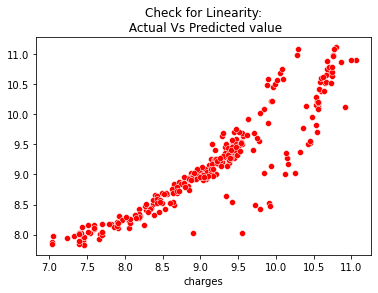

In [45]:
ax=sns.scatterplot(y_test,y_pred,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

In our model the actual vs predicted plot is curve so linear assumption fails

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


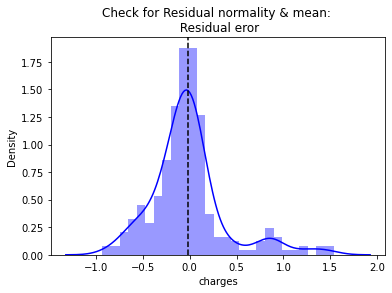

In [46]:
ax=sns.distplot((y_test - y_pred),color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

The residual mean is zero and residual error plot right skewed

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

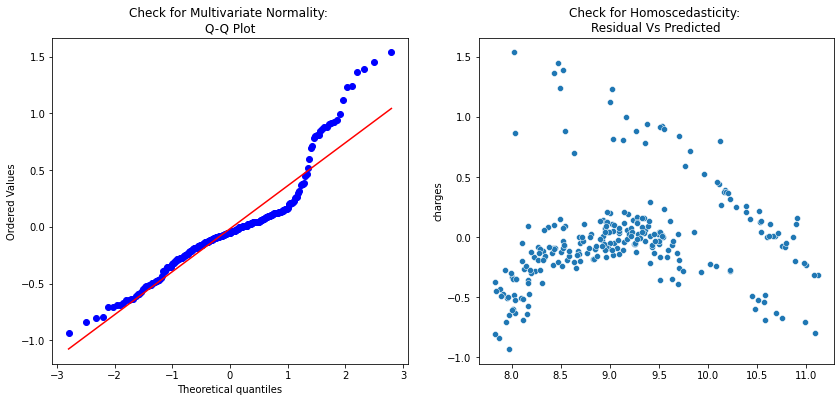

In [55]:
import scipy as sp
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2,figsize=(14,6))
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1]) 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

Q-Q plot shows as value log value greater than 1.5 trends to increase. The plot is exhibit heteroscedastic, error will increase after certain point.

In [51]:
VIF = 1/(1- r_square)
VIF

5.851229731456098

Variance inflation factor value is less than 5, so no multicollearity.

## Ridge Regression

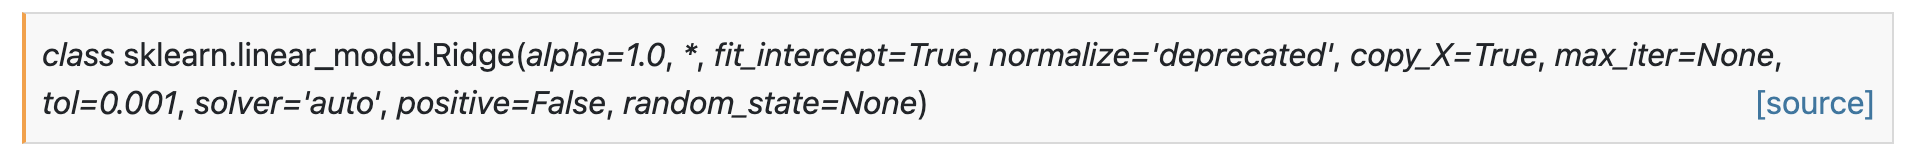

In [57]:
### contoh ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)
print(ridge.score(x_test, y_test))

7.04797836249449
[ 0.03411246  0.01281798 -0.07933008  0.13098674  0.27186865  0.21958018
  0.5558904   0.3944869   1.53423306 -0.04842134 -0.12998638 -0.10324546]
0.829019728644332


## Lasso Regression

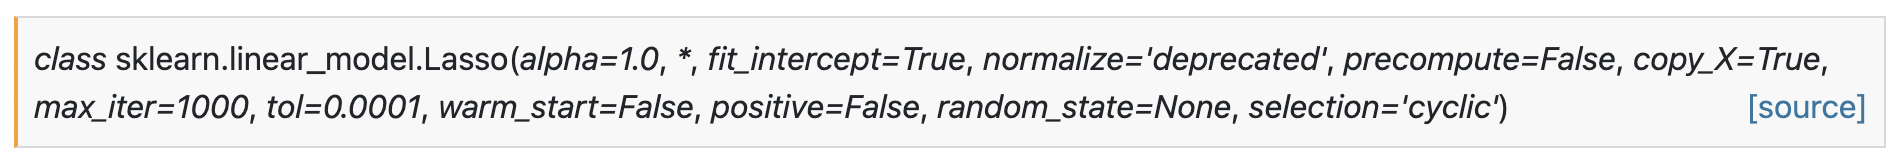

In [58]:
### contoh lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso.fit(x_train, y_train)
print(lasso.intercept_)
print(lasso.coef_)
print(lasso.score(x_test, y_test))

7.632140737679007
[ 0.03264787  0.00407144  0.         -0.          0.          0.
  0.          0.          0.2766936  -0.          0.         -0.        ]
0.4650392988436811
